

# Project 2: Investigate a Dataset of movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction
basiclly , in this report i talked about dataset of movies and how cleaning the data from dublicated values and missing values. 
after that i built some research question that is the basic of the methods, so all of the information and creative ideas that you will find it in this report it show the detaild answer of the question. 

The RESEARCH QUESTIONS ARE: 

FIRST/ Is there a relation between popularity and Vote ?
SECOND/which movie id had the highest budget ?
THIRD/ What are the top 5 directors they generate the highest revenue ? 
FOURTH/ Can we Visualize Count of released year for movies ? 

In [1]:
import numpy as num 
import pandas as pnd
import matplotlib.pyplot as mat
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

in this section we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. I wtite a notes of what i did in some steps.

### General Properties

In [2]:
df = pnd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Data cleaning 

on my opinion , all of these columns are useless on the investigation , so we need to make it more cleaner by drop it.

In [6]:
df.drop(['imdb_id','release_date','overview','homepage'], axis=1, inplace=True)

In [7]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


*The result of dataset after dropping 

# Missing Values

After dropping some values , I fond a missing values so we need to drop it to clean the dataset .Such of columns that contain a missing value: cast, tagline,keywords,director,genres, and production_companies

In [8]:
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.4+ MB


In [9]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 10865
Data columns (total 17 columns):
id                      7032 non-null int64
popularity              7032 non-null float64
budget                  7032 non-null int64
revenue                 7032 non-null int64
original_title          7032 non-null object
cast                    7032 non-null object
director                7032 non-null object
tagline                 7032 non-null object
keywords                7032 non-null object
runtime                 7032 non-null int64
genres                  7032 non-null object
production_companies    7032 non-null object
vote_count              7032 non-null int64
vote_average            7032 non-null float64
release_year            7032 non-null int64
budget_adj              7032 non-null float64
revenue_adj             7032 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 988.9+ KB


In [10]:
def dupliccated():
      return sum(df.duplicated())
dupliccated()
# this method help to avoid repeating when we want to cheack the duplicating

1

In [11]:
df.sort_values('id', inplace=True)
df.drop_duplicates(subset='id' , keep=False , inplace=True)
df
# to drop the duplicated values

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
8088,5,1.234890,4000000,4300000,Four Rooms,Tim Roth|Antonio Banderas|Jennifer Beals|Madon...,Allison Anders|Alexandre Rockwell|Robert Rodri...,Twelve outrageous guests. Four scandalous requ...,hotel|new year's eve|witch|bet|hotel room,98,Comedy,Miramax Films|A Band Apart,293,6.4,1995,5.723867e+06,6.153158e+06
10249,6,0.815631,0,12136938,Judgment Night,Emilio Estevez|Cuba Gooding Jr.|Denis Leary|Je...,Stephen Hopkins,Don't move. Don't whisper. Don't even breathe.,chicago|drug dealer|boxing match|escape|one night,110,Action|Thriller|Crime,Largo Entertainment|JVC Entertainment Networks,36,6.4,1993,0.000000e+00,1.832034e+07
1329,11,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,"A long time ago in a galaxy far, far away...",android|galaxy|hermit|death star|lightsaber,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,4428,7.9,1977,3.957559e+07,2.789712e+09
4955,12,3.440519,94000000,864625978,Finding Nemo,Albert Brooks|Ellen DeGeneres|Alexander Gould|...,Andrew Stanton|Lee Unkrich,"There are 3.7 trillion fish in the ocean, they...",predator|harbor|animation|seagull|underwater,100,Animation|Family,Walt Disney Pictures|Pixar Animation Studios|D...,3692,7.4,2003,1.114231e+08,1.024887e+09
4179,13,6.715966,55000000,677945399,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,"The world will never be the same, once you've ...",vietnam veteran|hippie|mentally disabled|runni...,142,Comedy|Drama|Romance,Paramount Pictures,4856,8.1,1994,8.091114e+07,9.973333e+08
2411,14,3.555720,15000000,356296601,American Beauty,Kevin Spacey|Annette Bening|Thora Birch|Wes Be...,Sam Mendes,Look closer.,adultery|coming out|loss of father|first time|...,122,Drama,DreamWorks SKG|Jinks/Cohen Company,1756,7.7,1999,1.963579e+07,4.664111e+08
8695,16,0.977410,12800000,40031879,Dancer in the Dark,BjÃ¶rk|Catherine Deneuve|David Morse|Peter Sto...,Lars von Trier,You don't need eyes to see.,individual|dancing|usa|robbery|factory worker,140,Drama|Crime|Music,Fine Line Features|Zentropa Entertainments|Dan...,190,7.4,2000,1.620854e+07,5.069205e+07
6869,17,0.546134,0,0,The Dark,Sean Bean|Maria Bello|Richard Elfyn|Maurice Ro...,John Fawcett,One of the living for one of the dead.,suicide|paradise|child abuse|sea|adolescence,87,Horror|Thriller|Mystery,Constantin Film|Impact Pictures|Isle of Man Fi...,31,5.2,2006,0.000000e+00,0.000000e+00
5235,18,2.972972,90000000,263920180,The Fifth Element,Bruce Willis|Gary Oldman|Ian Holm|Milla Jovovi...,Luc Besson,There is no future without it.,secret passage|clone|taxi|future|stowaway,126,Adventure|Fantasy|Action|Thriller|Science Fiction,Columbia Pictures|Gaumont,2649,7.1,1997,1.222614e+08,3.585251e+08
4951,22,6.864067,140000000,655011224,Pirates of the Caribbean: The Curse of the Bla...,Johnny Depp|Geoffrey Rush|Orlando Bloom|Keira ...,Gore Verbinski,Prepare to be blown out of the water.,exotic island|east india trading company|gold|...,143,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films,4223,7.3,2003,1.659494e+08,7.764193e+08


In [12]:
dupliccated()
# to make sure there is no duplicate values

0

In [13]:
len(df.query("revenue<1")) , len(df.query("budget<1"))

(2855, 2766)

In [14]:
RevWithZero = df[df['revenue'] < 1 ]
df.drop(RevWithZero.index, axis=0, inplace=True)
#To remove all zeroes values from revenue because it can effect the analysis

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 8088 to 3460
Data columns (total 17 columns):
id                      4175 non-null int64
popularity              4175 non-null float64
budget                  4175 non-null int64
revenue                 4175 non-null int64
original_title          4175 non-null object
cast                    4175 non-null object
director                4175 non-null object
tagline                 4175 non-null object
keywords                4175 non-null object
runtime                 4175 non-null int64
genres                  4175 non-null object
production_companies    4175 non-null object
vote_count              4175 non-null int64
vote_average            4175 non-null float64
release_year            4175 non-null int64
budget_adj              4175 non-null float64
revenue_adj             4175 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 587.1+ KB


In [16]:
budWithZero = df[df['budget'] < 1 ]
df.drop(budWithZero.index, axis=0, inplace=True)
#*To remove all zeroes values from budget because it can effect the analysis 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3444 entries, 8088 to 3460
Data columns (total 17 columns):
id                      3444 non-null int64
popularity              3444 non-null float64
budget                  3444 non-null int64
revenue                 3444 non-null int64
original_title          3444 non-null object
cast                    3444 non-null object
director                3444 non-null object
tagline                 3444 non-null object
keywords                3444 non-null object
runtime                 3444 non-null int64
genres                  3444 non-null object
production_companies    3444 non-null object
vote_count              3444 non-null int64
vote_average            3444 non-null float64
release_year            3444 non-null int64
budget_adj              3444 non-null float64
revenue_adj             3444 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 484.3+ KB


In [18]:
len(df.query("revenue<1")) , len(df.query("budget<1"))

(0, 0)

*As we can see after checking , there are no zeroes values

<a id='eda'></a>
## Exploratory Data Analysis

in this section we move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that i posed in the Introduction section. 
###  Question 1 : Is there a relation between popularity and Vote ?

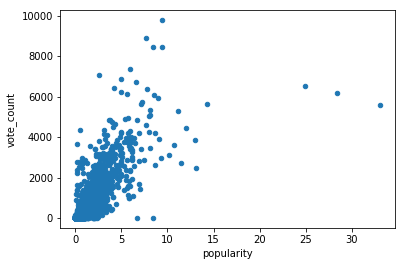

In [4]:
df.plot(x= "popularity", y="vote_count", kind="scatter")

If we notice the graph we will find the popularity increase and at the same time the vote count increase. that means there is a positive relation between popularity and vote.
For example, when the popularity = 15 , the vote = 6000

### Question 2 : which movie id had the highest budget ?

In [15]:
df.groupby("id")['budget'].mean().reset_index().sort_values('budget' , ascending=False)
#in this cell i grouped the original title with budget the i sort it

,id,budget
7356,46528,425000000
757,1865,380000000
147,285,300000000
8588,99861,280000000
607,1452,270000000
7484,49529,260000000
6953,38757,260000000
271,559,258000000
7731,57201,255000000
8821,122917,250000000


Text(0, 0.5, 'budget')

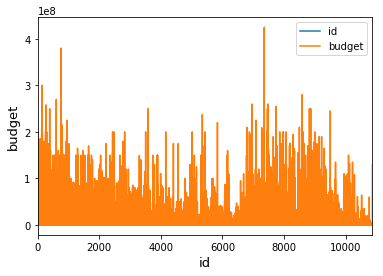

In [16]:
df.groupby("id" , as_index=False)["budget"].mean().plot()
mat.xlabel("id",fontsize=13)
mat.ylabel("budget",fontsize=13)

From this figure the budget is oscillating for the id , it seems like high with the first
id. however, it decreased around (2000-6500), then it increase again.
briefly, the budget is highest with id around 7000

### Question 3: What are the top 5 directors they generate the highest revenue ? 

Text(0, 0.5, 'revenue')

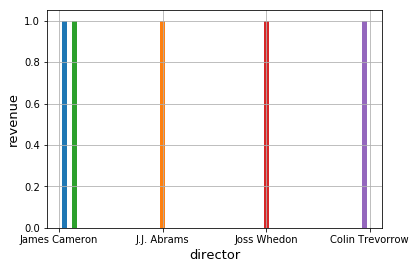

In [22]:
dfN = df.nlargest(5, 'revenue')
dfN['director'].hist(figsize=(6,4))
mat.xlabel("director",fontsize=13)
mat.ylabel("revenue",fontsize=13)


From this figure we can see the Top five directors that the generate the highest revenue.
they are: James Cameron , J.J.Abrams , Joss Whedon , and Colin Trevorrow

### Question 4 : Can we Visualize Count of released year for movies ? 

Text(0, 0.5, 'count of movies')

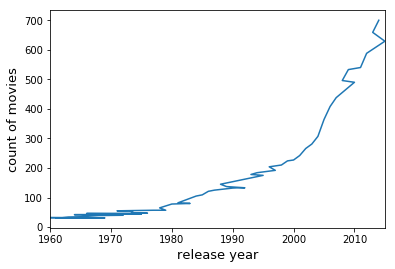

In [3]:
df['release_year'].value_counts().plot(kind='line');
mat.xlabel("release year",fontsize=13)
mat.ylabel("count of movies",fontsize=13)


After we calculating the count of movie values we can compare it with the release year,
from the figure we notice the increasing on count year by year , so if the number of years
increase the count of values also increase.

<a id='conclusions'></a>
## Conclusions

in conclusion , i aim some cleared results such as: 
first of all , when the movie becomes a popular it will get more voting , also the max value of voting is around 10000.
As a second idea , the budget is oscillating with the id because movies with id around 2000-6500 is lower budget than movies with id around 7000-10000.
Third idea , i summrized the top 5 directors that they generate the highest revenue that means they have a huge impact on movies world. 
Fourth idea , i count the movie valuse of the release year that can help us to visulize the number of movies in each year and as we see it increase year by year without any decreasing. 


## limitation

The analysis is limited only on the place of the data was gathring. Also when i try to compute
a statistics for genders it has a huge data i can not gather them in a figure or find a way 
to represent them.Moreover, there is a lot of missing values that has an impact on the analysis
especially in the revenue and budget values.

###### Thank you for reading :)